In [392]:
#Importing necessary packages
import math 
import io
import numpy as np
import pandas as pd
from matplotlib import pyplot
from matplotlib.pyplot import figure

import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import scipy.optimize
import scipy.spatial
from scipy.stats import norm
from matplotlib import rcParams

In [393]:
#Read data frame
df = pd.read_csv(r'poll.csv')

In [394]:
#Collect important information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [395]:
#Show first 5 rows
df.head()

,vote
0,BJP
1,INC
2,BJP
3,BJP
4,BJP


In [396]:
#Count values
df.vote.value_counts()

BJP    511
INC    489
Name: vote, dtype: int64

In [397]:
#Normalise counted values
df.vote.value_counts(normalize = True)


BJP    0.511
INC    0.489
Name: vote, dtype: float64

In [398]:
#Define a function to simulate another sample with similar distribution
def sample (bjp_cut, n):
    return pd.DataFrame({'vote':np.where(np.random.rand(n) < bjp_cut, 'BJP', 'INC')}) 

In [399]:
#let 's' be the sample function with  selected values
s = sample(0.51, 1000)

In [400]:
#summarize dataframe returned by s 
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [401]:
#Show data frame created by s function
s

,vote
0,BJP
1,INC
2,BJP
3,BJP
4,INC
...,...
995,INC
996,BJP
997,INC
998,BJP


In [402]:
#Show first five rows of s 
s.head()

,vote
0,BJP
1,INC
2,BJP
3,BJP
4,INC


In [403]:
#Count the simulated vote distribution for each party 
s.vote.value_counts(normalize=True)

BJP    0.507
INC    0.493
Name: vote, dtype: float64

In [404]:
#Create a distribution dataframe for 1000 such simulations
dist = pd.DataFrame([sample(0.51, 1000).vote.value_counts(normalize=True) for i in range(1000)])

In [405]:
dist

,INC,BJP
vote,0.516,0.484
vote,0.508,0.492
vote,0.502,0.498
vote,0.489,0.511
vote,0.485,0.515
...,...,...
vote,0.473,0.527
vote,0.462,0.538
vote,0.528,0.472
vote,0.469,0.531


In [406]:
#Show first five rows of such distribution
dist.head()

,INC,BJP
vote,0.516,0.484
vote,0.508,0.492
vote,0.502,0.498
vote,0.489,0.511
vote,0.485,0.515


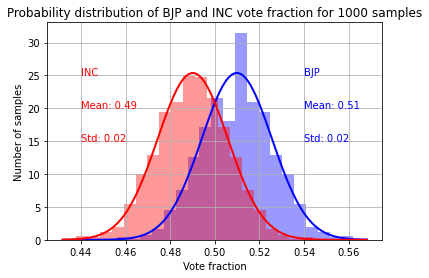

<Figure size 720x360 with 0 Axes>

In [407]:
#Create histogram showing probability distribution dof BJP vote fraction in 1000 samples datafrmaes
dist.BJP.hist(bins=20, density=True, alpha=0.4, color='b')
dist.INC.hist(bins=20, density=True, alpha=0.4, color='r')

# Add title and axis names
plt.title('Probability distribution of BJP and INC vote fraction for 1000 samples')
plt.xlabel('Vote fraction')
plt.ylabel('Number of samples')

# Fit a normal distribution to the data:
# mean and standard deviation
mu, std = norm.fit(dist.BJP) 
Mu, Std = norm.fit(dist.INC)  

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
P = norm.pdf(x, Mu, Std)  
plt.plot(x, p, 'b', linewidth=2)
plt.plot(x, P, 'r', linewidth=2)

#Set data statistical parameters as text
bjp_mean = "Mean: {:.2f}".format(mu) 
bjp_std = "Std: {:.2f}".format(std)
plt.text(0.54, 25, "BJP", c='b')
plt.text(0.54, 20, bjp_mean, c='b')
plt.text(0.54, 15, bjp_std, c='b')

inc_mean = "Mean: {:.2f}".format(Mu) 
inc_std = "Std: {:.2f}".format(Std)
plt.text(0.44, 25, "INC", c='r')
plt.text(0.44, 20, inc_mean, c='r')
plt.text(0.44, 15, inc_std, c='r')
rcParams['figure.figsize'] = (10,5)

fig = plt.figure()


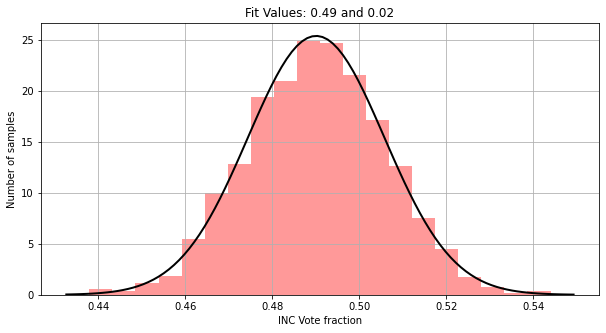

In [408]:
#Create histogram showing probability distribution of INC vote fraction in 1000 samples datafrmaes
dist.INC.hist(bins=20, density=True, alpha=0.4, color='r')
# Add title and axis names
plt.title('Probability distribution of BJP vote fraction for 1000 samples')
plt.xlabel('INC Vote fraction')
plt.ylabel('Number of samples')

# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(dist.INC) 
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

In [409]:
#Creating function of simulating distribution for varying bjp_cut 
def samplingdist(bjp_cut, n=1000):
        return pd.DataFrame(sample(bjp_cut, n).vote.value_counts(normalize=True) for i in range(1000))

In [410]:
#Creating function for showing range of 95 percent confidence
def quantiles(bjp_cut, n=1000):
    dist = samplingdist(bjp_cut, n)
    return dist.BJP.quantile(0.025), dist.BJP.quantile(0.975)

In [411]:
#Confidence Range when bjp_cut is set to 0.5
quantiles(0.50)

(0.468975, 0.532)

In [412]:
#Confidence range when bjp_cut is set to 0.48
quantiles(0.48)

(0.447, 0.511)

In [413]:
#Confidence range when bjp_cut is set to 0.54
quantiles(0.54)

(0.509, 0.572)

In [414]:
#
dist = samplingdist(0.50, 10000)

Text(0, 0.5, 'values')

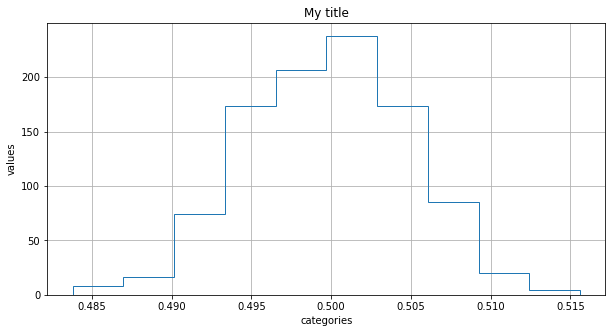

In [415]:
dist.BJP.hist(histtype='step')
# Add title and axis names
plt.title('My title')
plt.xlabel('categories')
plt.ylabel('values')

In [416]:
largepoll = pd.read_csv('large-poll.csv')

In [417]:
largepoll.vote.value_counts(normalize=True)

INC    0.5181
BJP    0.4819
Name: vote, dtype: float64

In [ ]:
dist = pd.DataFrame(sample(0.50,10000).vote.value_counts(normalize=True) for i  in range(1000))

In [ ]:
dist.INC.hist(histtype='step',bins=20)
# Add title and axis names
plt.title('My title')
plt.xlabel('categories')
plt.ylabel('values')